In [26]:
#setting parameters
import random
import math
p=1.5#the threshold of probability 
N=100#number of nodes in the graph
disthres=0.12
from Connect import is_connect,find_component

In [27]:
#generating the tested graph
#the existence of the edge between any two nodes is subjected to an uniform distribution on (0,1)
a=[0]*N
b=[0]*N
for x in range(N):
    a[x]=random.uniform(0,1)
    b[x]=random.uniform(0,1)
mat=[]#adjacent matrix
for x in range(N):
	mat.append([0]*N)
for x in range(N):
	for y in range(x+1,N):
		if random.uniform(0,1)<p and math.sqrt((a[x]-a[y])**2+(b[x]-b[y])**2)<disthres:
			mat[x][y]=1
			mat[y][x]=1

In [28]:
pip install matplotlib


The following command must be run outside of the IPython shell:

    $ pip install matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


The graph is not connected


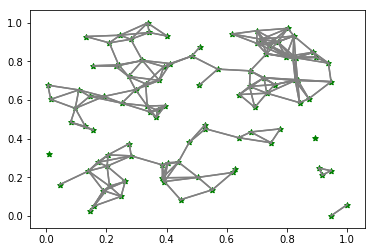

In [29]:
#test if the graph is connected
import matplotlib.pyplot as plt
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
is_connect(mat)

0,47,57,92,10,17,84,52,98,20,22,74,79,80,23,70,73,41,66,68,93,86,46,51,65,53,63,67,29,5,50,71,81,25,69,6,45,9,24,87,37,15,54,2,55,32,12,40,16,26,72,76,11,35,19,77,90,28,99,30
1,44
3,36,42,49,4,82,97,58,95,61
7,14,31,34,59,60
8,21,39,18,62,78,94,43,38,56,85,91,96,89
13
27
33
48,75,88,64,83


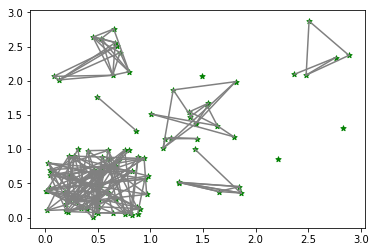

In [24]:
#find all the connected components in a graph
comp=find_component(mat)
numcomp=len(comp)
m=math.ceil(math.sqrt(numcomp))
xpos=[0]*N
ypos=[0]*N
for k in range(m):
    for r in range(m):
        ind=k*m+r
        if ind<numcomp:
            for nt in comp[ind]:
                xpos[nt]=random.uniform(k,k+1)
                ypos[nt]=random.uniform(r,r+1)
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
            

The component consisting of the nodes:

0,47,57,92,10,17,84,52,98,20,22,74,79,80,23,70,73,41,66,68,93,86,46,51,65,53,63,67,29,5,50,71,81,25,69,6,45,9,24,87,37,15,54,2,55,32,12,40,16,26,72,76,11,35,19,77,90,28,99,30
has a cycle consisting of the nodes:

47,57,0
The component consisting of the nodes:

1,44
has no cycle

The component consisting of the nodes:

3,36,42,49,4,82,97,58,95,61
has a cycle consisting of the nodes:

36,42,3
The component consisting of the nodes:

7,14,31,34,59,60
has a cycle consisting of the nodes:

14,31,7
The component consisting of the nodes:

8,21,39,18,62,78,94,43,38,56,85,91,96,89
has a cycle consisting of the nodes:

21,39,8
The component consisting of the nodes:

13
has no cycle

The component consisting of the nodes:

27
has no cycle

The component consisting of the nodes:

33
has no cycle

The component consisting of the nodes:

48,75,88,64,83
has no cycle



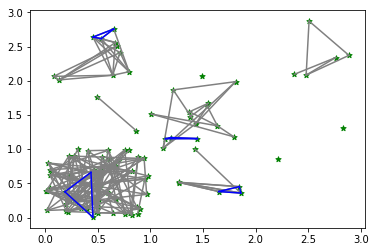

In [25]:
#find for each connected component if there is any cycle
from CycleGen import detect_cycle_gen
res=detect_cycle_gen(mat)
comp=res[0]
cmpcycle=res[1]
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
for cycle in cmpcycle:
    if cycle!=[]:
        for t in range(len(cycle)-1):
            x=cycle[t]
            y=cycle[t+1]
            if mat[x][y]==1:
                plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")
        x=cycle[len(cycle)-1]
        y=cycle[0]
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")